# Análisis de los incritos en el Cabildo de Científicxs

### FCFM, 4 de noviembre de 2019


In [71]:
import pandas as pd
import numpy as np
import re
import nltk

import warnings
warnings.filterwarnings("ignore")

In [72]:
datos = pd.read_excel("inscritosCabildo_sinRUT.xlsx")

In [73]:
datos.shape

(186, 6)

In [74]:
datos.sample(3)

,Timestamp,Edad,Sexo,Etapa en la que estás en tu carrera,Facultad en la que trabajas (e.g. FCFM),Universidad a la que pertences (e.g U.Chile)
155,2019-11-04 14:44:14.638,24,Masculino,Estudiante,FCFM,U.Chile
159,2019-11-04 14:53:20.493,23,Masculino,Estudiante,FCFM,U.Chile
61,2019-11-04 14:14:03.053,19,Femenino,Estudiante,FCFM,U. Chile


In [75]:
datos.columns = ['timestamp', 'edad', 'sexo', 'posicion', 'lugar', 'institucion']

In [76]:
list(datos.columns)

['timestamp', 'edad', 'sexo', 'posicion', 'lugar', 'institucion']

In [77]:
pd.DataFrame(datos.isnull().sum() * 100 / len(datos))

,0
timestamp,0.000000
edad,0.000000
sexo,0.000000
posicion,0.000000
lugar,6.451613
institucion,2.688172


In [475]:
datos['lugar'] = datos['lugar'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
datos['lugar'] = datos['lugar'].str.lower().str.strip() # todo en caps off y fuera espacios


datos['lugarNormalizado'] = datos['lugar'].replace(["facultad de ciencias quimicas y farmaceuticas",
     "fcqyf", "faciqyf", "fciqyf", "fcqyf", "ciencias quimicas y farmaceuticas", "fac de ciencias quimicas y farmaceuticas", 
                                                              "facultad de quimica y de farmacia puc", "farmacia"] ,
                                                              "Ciencias Químicas y Farmacéuticas")

datos['lugarNormalizado'] = datos['lugarNormalizado'].replace(["ingenieria", "fcfm", "beauchef", "fcfm-dfi", "cmm", "ingenieria uc", 
                                                   "facultad de ingenieria uc", "facultad de ingenieria", "fcfm - fmed"] , 
                                                   "Ingenieria")

datos['lugarNormalizado'] = datos['lugarNormalizado'].replace(["geologia", "geologia unab", "fcfm geologia"] , 
                                                   "Geologia")

datos['lugarNormalizado'] = datos['lugarNormalizado'].replace(["ciencias biologicas",
     "ciencias de la vida", "facultad de ciencias biologicas uc", "facultad de ciencias de la vida", "gema"] ,
                                                              "Ciencias Biológicas")

datos['lugarNormalizado'] = datos['lugarNormalizado'].replace(["medicina",
     "icbm - facultad de medicina", "medicina esp", "facultad de medicina", "escuela de medicina uc", "salud", "iibm uc"] , "Medicina/Biomedicina")

datos['lugarNormalizado'] = datos['lugarNormalizado'].replace(["artes",
     "ffhh", "fundacion juan enrique lagarrigue"] , "Artes y Humanidades")

datos['lugarNormalizado'] = datos['lugarNormalizado'].replace(["ninguna",
                                                               "na", "ciencias veterinarias y pecuarias",
                                                               "facultad de arquitectura", "salud"] , "Otros")

datos['institucion'] = datos['institucion'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
datos['institucion'] = datos['institucion'].str.lower().str.strip() 

datos['institucionNormalizada'] = datos['institucion'].replace(["uchile", "u de chile", "u. chile", 
     "u chile", "u. de chile", "u.chile", "fcfm", "universidad de chile", "uch", "chile"] , "Uchile")

datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["puc", "universidad catolica de chile", "uc"] , "PUC")
datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["universidad andres bello", 
     "universidad nacional andres bello", "andres bello", "unab"] , "UNAB")

datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["u mayor", 
     "universidad mayor"] , "UMayor")

datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["universidad de la serena"] , "USerena")
datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["duoc uc"] , "DUOC UC")
datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["me pertenezco a mi"] , "Otro")
datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["titulada uandes"] , "UAndes")
datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["egresado universidad arcis"] , "ARCIS")
datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["universidad de concepcion"] , "UdeC")
datos['institucionNormalizada'] = datos['institucionNormalizada'].replace(["universidad de valparaiso"] , "UV")





In [476]:
datos.sample(10)

,timestamp,edad,sexo,posicion,lugar,institucion,lugarNormalizado,institucionNormalizada
10,2019-11-04 14:10:40.035,21,Femenino,Estudiante,fcfm,u.chile,Ingenieria,Uchile
104,2019-11-04 14:18:06.611,23,Femenino,Estudiante,faciqyf,u. chile,Ciencias Químicas y Farmacéuticas,Uchile
135,2019-11-04 14:25:54.574,20,Femenino,Estudiante,ciencias quimicas y farmaceuticas,uchile,Ciencias Químicas y Farmacéuticas,Uchile
22,2019-11-04 14:11:59.791,26,Masculino,Estudiante,fcfm,u.chile,Ingenieria,Uchile
161,2019-11-04 14:54:51.983,26,Masculino,Estudiante,iibm uc,puc,Medicina/Biomedicina,PUC
154,2019-11-04 14:43:12.597,20,Femenino,Estudiante,fcfm,u chile,Ingenieria,Uchile
150,2019-11-04 14:39:45.733,19,Masculino,Estudiante,fcfm,u.chile,Ingenieria,Uchile
119,2019-11-04 14:22:39.207,24,Masculino,Estudiante,geologia unab,unab,Geologia,UNAB
155,2019-11-04 14:44:14.638,24,Masculino,Estudiante,fcfm,u.chile,Ingenieria,Uchile
110,2019-11-04 14:20:43.913,30,Masculino,Investigador,facultad de arquitectura,u.chile,Otros,Uchile


##  Estadísticas sumarias

In [477]:
datos['edad'].describe()

count    186.000000
mean      27.010753
std        8.997290
min       18.000000
25%       21.250000
50%       24.000000
75%       29.750000
max       72.000000
Name: edad, dtype: float64

In [478]:
datos['sexo'].value_counts(normalize=False)

Masculino    117
Femenino      68
Otro           1
Name: sexo, dtype: int64

In [479]:
datos['sexo'].value_counts(normalize=True)

Masculino    0.629032
Femenino     0.365591
Otro         0.005376
Name: sexo, dtype: float64

In [482]:
datos['posicion'].value_counts(normalize=False)

Estudiante          132
Investigador         21
Académico            19
Otro / No Aplica     14
Name: posicion, dtype: int64

In [483]:
datos['posicion'].value_counts(normalize=True)

Estudiante          0.709677
Investigador        0.112903
Académico           0.102151
Otro / No Aplica    0.075269
Name: posicion, dtype: float64

In [484]:
datos['lugarNormalizado'].value_counts(normalize=False)

Ingenieria                           131
Ciencias Químicas y Farmacéuticas     19
Medicina/Biomedicina                   9
Ciencias Biológicas                    5
Otros                                  4
Geologia                               3
Artes y Humanidades                    3
Name: lugarNormalizado, dtype: int64

In [485]:
datos['lugarNormalizado'].value_counts(normalize=True)

Ingenieria                           0.752874
Ciencias Químicas y Farmacéuticas    0.109195
Medicina/Biomedicina                 0.051724
Ciencias Biológicas                  0.028736
Otros                                0.022989
Geologia                             0.017241
Artes y Humanidades                  0.017241
Name: lugarNormalizado, dtype: float64

In [486]:
datos['institucionNormalizada'].value_counts(normalize=False)

Uchile     158
UNAB         8
PUC          6
UMayor       2
UV           1
DUOC UC      1
UAndes       1
USerena      1
Otro         1
UdeC         1
ARCIS        1
Name: institucionNormalizada, dtype: int64

In [487]:
datos['institucionNormalizada'].value_counts(normalize=True)

Uchile     0.872928
UNAB       0.044199
PUC        0.033149
UMayor     0.011050
UV         0.005525
DUOC UC    0.005525
UAndes     0.005525
USerena    0.005525
Otro       0.005525
UdeC       0.005525
ARCIS      0.005525
Name: institucionNormalizada, dtype: float64

## Figuras

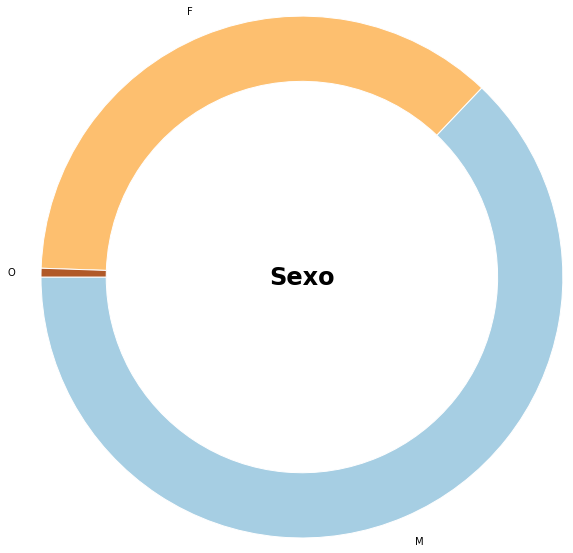

In [513]:
import matplotlib.pyplot as plt
import numpy as np


def donnut_plot(sizes, text, labels):

    color = plt.cm.get_cmap('Paired', len(labels))
    col = color.colors.tolist()

    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.75
    kwargs = dict(colors=col, startangle=180)
    outside, _ = ax.pie(sizes, radius=3, pctdistance=1-width/2,labels=labels,**kwargs)
    plt.setp(outside, width=width, edgecolor='white')
    plt.setp(_, size=10, weight="light")

    kwargs = dict(size=24, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    plt.show()


donnut_plot(datos['sexo'].value_counts(normalize=False).values, "Sexo",['M','F', 'O'])

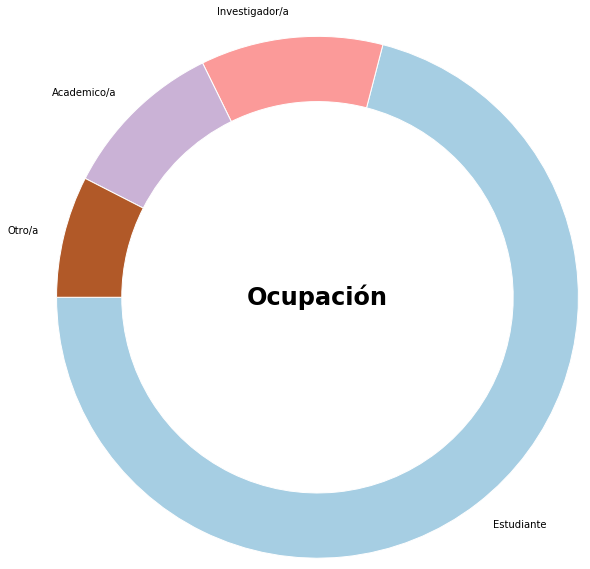

In [514]:
donnut_plot(datos['posicion'].value_counts(normalize=False).values, "Ocupación",['Estudiante','Investigador/a', 'Academico/a', 'Otro/a'])

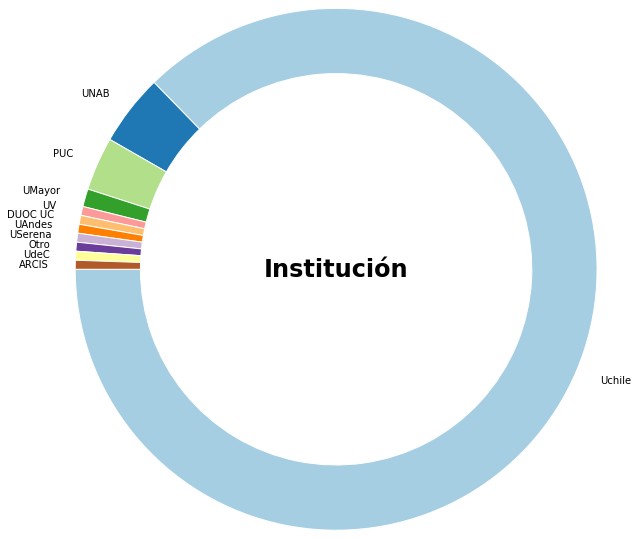

In [515]:
dato = datos['institucionNormalizada'].value_counts(normalize=False)
donnut_plot(dato.values, "Institución",dato.index.tolist())

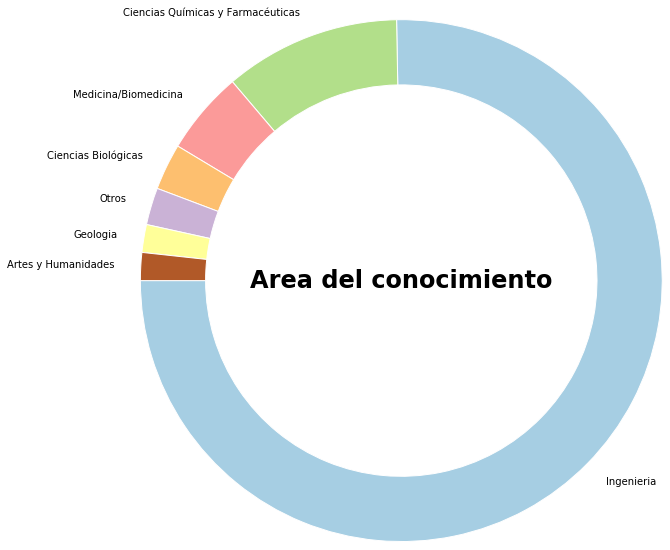

In [516]:
dato = datos['lugarNormalizado'].value_counts(normalize=False)
donnut_plot(dato.values, "Area del conocimiento",dato.index.tolist())

## Guardamos Tablas

In [519]:
writer = pd.ExcelWriter('TablasInscritos.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
datos['sexo'].value_counts(normalize=False).to_excel(writer, sheet_name='sexo')
datos['posicion'].value_counts(normalize=False).to_excel(writer, sheet_name='posicion')
datos['lugarNormalizado'].value_counts(normalize=False).to_excel(writer, sheet_name='area')
datos['institucionNormalizada'].value_counts(normalize=False).to_excel(writer, sheet_name='institucion')
datos['edad'].describe().to_excel(writer, sheet_name='edad')

writer.save()